# Bubble Plot

In [2]:
import pandas as pd
data = pd.read_excel("../0_dataset_master/Experiment_edited_V7_rr_with_correction.xlsx")

In [3]:
data = data.sort_values(by='SET', ascending=True)

R-squared: 0.9686419969467881
Formula: y = 0.0 + -2.289168981891076 x + 0.2535741431231741 x^2 + -0.009024459648073862 x^3 + 0.0001043286384880826 x^4


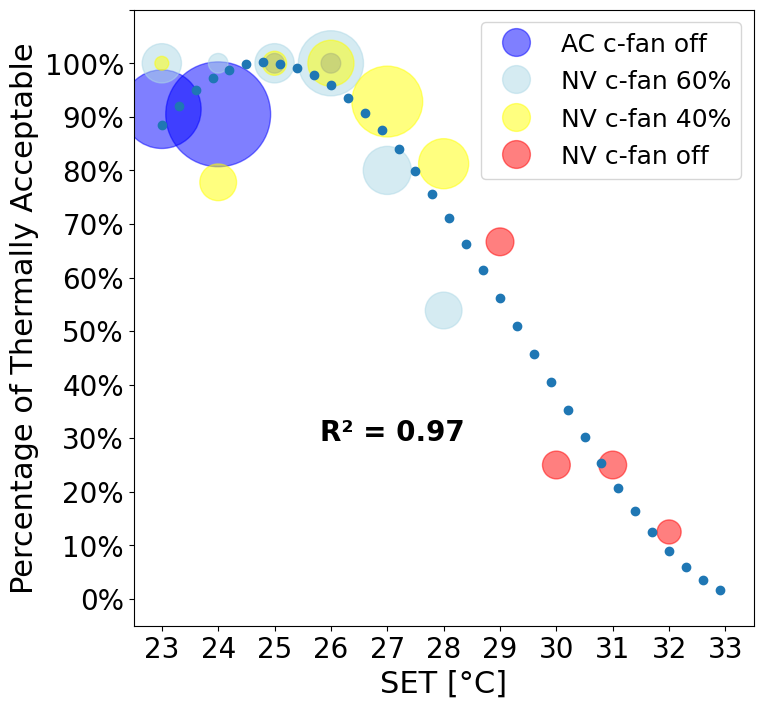

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D
from sklearn.pipeline import Pipeline

plt.figure(figsize=(8, 8))

colorMap = {
    'AC':"#0000FF",
    'NV fan 5':"#ADD8E6",
    'NV fan 3':"#FFFF00", 
    'NV fan 0':"#FF0000"
}
labels = {
    'AC':"AC c-fan off",
    'NV fan 5':"NV c-fan 60%",
    'NV fan 3':"NV c-fan 40%", 
    'NV fan 0':"NV c-fan off"
}

custom_handles = []
custom_labels = []
# bubble plot process
for thermalType in colorMap.keys():
    dataFilteredByThermalType = data[data['Thermal']==thermalType].copy()
    Y = dataFilteredByThermalType['ThermalAcceptability'].copy()
    x_list = np.floor(dataFilteredByThermalType['SET']).astype(int).values.copy()
    coordinates = list(zip(x_list, Y))
    counts = Counter(coordinates)
    # Extract x, y, and size data
    x = [coord[0] for coord in counts.keys()]
    y = [coord[1] for coord in counts.keys()]
    sizes = [count for count in counts.values()]

    # Sample DataFrame
    dict_data = {
        'x': x,
        'y': y,
        'size': sizes
    }
    df = pd.DataFrame(dict_data)

    # Define custom aggregation function
    def custom_agg(x):
        return pd.Series({'y': x[x['y']>=3]['size'].sum()/x['size'].sum(), 'size': x[x['y']>=3]['size'].sum()*100})
    
    # Grouping by 'x' and aggregating y and size
    grouped_df = df.groupby('x').apply(custom_agg).reset_index()
    # Plotting the bubble plot
    plt.scatter(grouped_df['x'], grouped_df['y'], s=grouped_df['size'], alpha=0.5, c=colorMap[thermalType])
    custom_handles.append(
       Line2D([0], [0], marker='o', color=colorMap[thermalType], markersize=20, alpha=0.5, linewidth=0)
    )
    custom_labels.append(
       labels[thermalType]
    )


Y = data['ThermalAcceptability'].copy()
X = np.floor(data['SET']).astype(int).copy()

coordinates = list(zip(X, Y))
counts = Counter(coordinates)
# Extract x, y, and size data
x = [coord[0] for coord in counts.keys()]
y = [coord[1] for coord in counts.keys()]
sizes = [count for count in counts.values()]

# Sample DataFrame
dict_data = {
    'x': x,
    'y': y,
    'size': sizes
}
df = pd.DataFrame(dict_data)

# Define custom aggregation function
def custom_agg(x):
    return pd.Series({'y': x[x['y']>=3]['size'].sum()/x['size'].sum(), 'size': x[x['y']>=3]['size'].sum()*100})

# Grouping by 'x' and aggregating y and size
grouped_df = df.groupby('x').apply(custom_agg).reset_index()

# regression code
poly_features = Pipeline([('poly', PolynomialFeatures(degree=4, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly_features.fit(grouped_df['x'].values.reshape(-1,1),grouped_df['y'].values.reshape(-1,1))
r_squared = poly_features.score(grouped_df['x'].values.reshape(-1,1),grouped_df['y'].values.reshape(-1,1))

# Get formula
intercept = poly_features.named_steps['linear'].intercept_
coefficients = poly_features.named_steps['linear'].coef_

# Print R-squared value and formula
print("R-squared:", r_squared)
print("Formula: y =", intercept, "+", coefficients[0][0], "x +", coefficients[0][1], "x^2 +", coefficients[0][2], "x^3 +", coefficients[0][3], "x^4")

# reg plot
x_pred = np.arange(grouped_df.x.min(), grouped_df.x.max(), 0.3)
plt.scatter(x_pred.reshape(-1,1), poly_features.predict(x_pred.reshape(-1,1)))
plt.xticks(np.arange(data.SET.astype(int).min(), data.SET.max(), 1), fontsize=20)
plt.yticks(np.arange(0, 1.2, 0.1), ['0%','10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%', ''], fontsize=20)
plt.xlabel('SET [°C]', fontsize=22)  # Set x-axis title
plt.ylabel('Percentage of Thermally Acceptable', fontsize=22)  # Set y-axis title
plt.text(.3, .3, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=20, fontweight='bold')
plt.legend(custom_handles, custom_labels, handleheight=1, fontsize=18)
plt.show() 

# ASHRAE Plot

In [5]:
import pythermalcomfort.models as ptc
outdoorTemp = pd.read_csv("../0_dataset_master/bcaa_weather_0425_0929_updated.csv")
masterDataAshrae = pd.read_excel("../0_dataset_master/Experiment_edited_V7_rr_with_correction.xlsx")
print(f"Data before filtered: {len(masterDataAshrae)} rows")
masterDataAshrae = masterDataAshrae[masterDataAshrae['Thermal']!="AC"]
print(f"Data after filtered: {len(masterDataAshrae)} rows")
outdoorTemp

Data before filtered: 306 rows
Data after filtered: 204 rows


,GMT+08:00,"Solar Radiation (S-LIB 21661173:21515235-1), W/m^2, ideaslab","Temperature (S-THC 21661173:21555952-1), *C, ideaslab","RH (S-THC 21661173:21555952-2), %, ideaslab","Dew Point (S-THC 21661173:21555952-3), *C, ideaslab","Wind Speed (S-WCG 21661173:21556122-1), m/s, ideaslab","Gust Speed (S-WCG 21661173:21556122-2), m/s, ideaslab","Wind Direction (S-WCG 21661173:21556122-3), *, ideaslab","Rain (S-RGB 21661173:21560962-1), mm, ideaslab"
0,2023/04/25 13:10,47,32.250,60.337,23.613,1.0,3.0,141.0,0.0
1,2023/04/25 13:15,49,31.392,64.553,23.930,1.7,4.0,125.0,0.0
2,2023/04/25 13:20,71,30.663,68.003,24.106,1.3,4.3,122.0,0.0
3,2023/04/25 13:25,102,30.191,70.106,24.164,1.7,4.3,159.0,0.0
4,2023/04/25 13:30,157,29.633,71.360,23.926,1.3,4.0,196.0,0.0
...,...,...,...,...,...,...,...,...,...
42760,2023/09/29 14:50,153,29.719,75.674,24.991,2.3,4.0,121.0,0.0
42761,2023/09/29 14:55,152,29.826,74.185,24.761,1.3,3.0,122.0,0.0
42762,2023/09/29 15:00,164,29.826,74.327,24.793,2.0,3.3,121.0,0.0
42763,2023/09/29 15:05,211,30.019,72.789,24.628,1.7,3.0,121.0,0.0


In [6]:
outdoorTemp['Date'] = pd.to_datetime(outdoorTemp[' GMT+08:00'], format='%Y/%m/%d %H:%M')
outdoorTemp['Date_plus_5_minutes'] = outdoorTemp['Date'] + pd.Timedelta(minutes=5)

In [7]:
def getOutdoorTemp(x):
    return outdoorTemp[(outdoorTemp['Date']>=x['Start Date']) & (outdoorTemp['Date_plus_5_minutes']<=x['End Date'])]['Temperature (S-THC 21661173:21555952-1), *C, ideaslab'].mean()

masterDataAshrae['outdoorTemp'] = masterDataAshrae.apply(lambda row: getOutdoorTemp(row), axis=1)

In [ ]:
def calculateOperativeTemperature(row):
    return 

In [8]:
masterDataAshrae['tmp_cmf_80_low'] = masterDataAshrae.apply(lambda row: ptc.adaptive_ashrae(tdb = row['T'], tr=row['Tgl'], t_running_mean=row['outdoorTemp'], v=row['v_adj'])['tmp_cmf_80_low'], axis=1)
masterDataAshrae['tmp_cmf_80_up'] = masterDataAshrae.apply(lambda row: ptc.adaptive_ashrae(tdb = row['T'], tr=row['Tgl'], t_running_mean=row['outdoorTemp'], v=row['v_adj'])['tmp_cmf_80_up'], axis=1)
masterDataAshrae['operative_temperature'] = masterDataAshrae.apply(lambda row: ptc.adaptive_ashrae(tdb = row['T'], tr=row['Tgl'], t_running_mean=row['outdoorTemp'], v=row['v_adj'])['tmp_cmf'], axis=1)

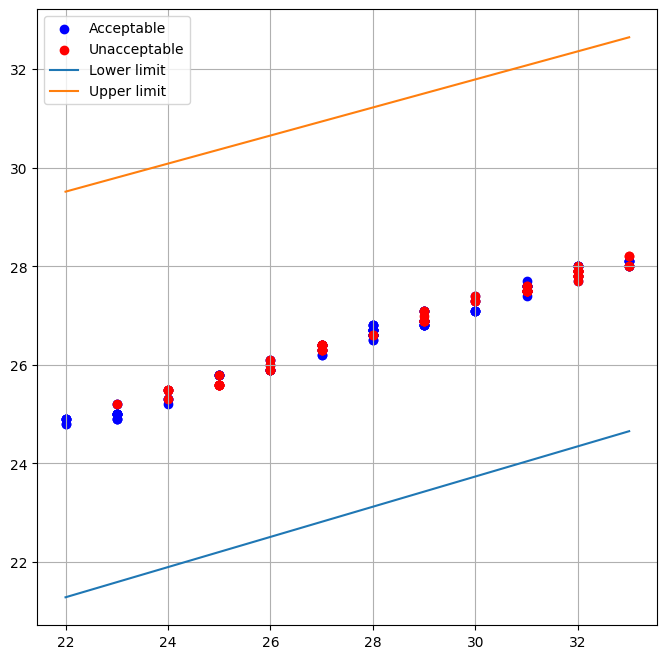

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 8))
plt.grid()

masterDataAshrae = masterDataAshrae.sort_values(by='outdoorTemp', ascending=False)

for thermalAcc in ["Acceptable", "Unacceptable"]:
    if thermalAcc == "Acceptable":
        dataFilteredByThermalType = masterDataAshrae[(masterDataAshrae['ThermalAcceptability'] == 3) | (masterDataAshrae['ThermalAcceptability'] == 4)]
        Y = dataFilteredByThermalType['tmp_cmf'].copy().values
        X = np.floor(dataFilteredByThermalType['outdoorTemp']).astype(int).copy()
        plt.scatter(X,Y, c="b", label=thermalAcc)
    else:
        dataFilteredByThermalType = masterDataAshrae[(masterDataAshrae['ThermalAcceptability'] == 1) | (masterDataAshrae['ThermalAcceptability'] == 2)]
        Y = dataFilteredByThermalType['tmp_cmf'].copy().values
        X = np.floor(dataFilteredByThermalType['outdoorTemp']).astype(int).copy()
        plt.scatter(X,Y, c="r", label=thermalAcc)

X = np.floor(masterDataAshrae['outdoorTemp']).astype(int).copy()
modelLower = LinearRegression()
modelLower.fit(X.values.reshape(-1,1), masterDataAshrae.tmp_cmf_80_low.values.reshape(-1,1))
plt.plot(X, modelLower.predict(X.values.reshape(-1,1)), label="Lower limit")

modelUpper = LinearRegression()
modelUpper.fit(X.values.reshape(-1,1), masterDataAshrae.tmp_cmf_80_up.values.reshape(-1,1))
plt.plot(X, modelUpper.predict(X.values.reshape(-1,1)), label="Upper limit")

plt.legend()
plt.show() 